In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale

In [31]:
Year = [1, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14]
PPP = [1700, 1700, 2300, 2900, 3000, 3500, 4000, 8000, 11000, 9000, 9200]

In [32]:
Year = sm.add_constant(Year)

In [33]:
mod = sm.OLS(PPP, Year)

In [34]:
res = mod.fit()

In [35]:
res.params

array([-235.82240161,  736.17558022])

In [36]:
res.summary()

C:\Users\bbaah\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     40.75
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           0.000128
Time:                        20:53:01   Log-Likelihood:                -95.296
No. Observations:                  11   AIC:                             194.6
Df Residuals:                       9   BIC:                             195.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -235.8224    959.819     -0.246      0.811   -2407.084    1935.439
x1           736.1756    115.321      6.384      0.000     475.301     997.050
==============================================================================
Omnibus:                        2.922   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                1.473
Skew:                           0.893   Prob(JB):                        0.479
Kurtosis:                       2.837   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
Year = [1, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14]
PPP = [1700, 1700, 2300, 2900, 3000, 3500, 4000, 8000, 11000, 9000, 9200]

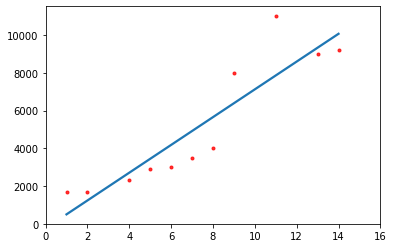

In [39]:
sns.regplot(Year, PPP, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,16)
plt.ylim(ymin=0);

In [42]:
#another approach
lm = skl_lm.LinearRegression()

In [45]:
#reshape the array of Years into a 2D array (required input format for scikit learn linear regression model)
Year = scale(Year, with_mean=True, with_std=False).reshape(-1,1)

In [46]:
model = lm.fit(Year,PPP)

In [49]:
predictions = lm.predict(Year)
predictions

array([  500.35317861,  1236.52875883,  2708.87991927,  3445.0554995 ,
        4181.23107972,  4917.40665994,  5653.58224016,  6389.75782038,
        7862.10898083,  9334.46014127, 10070.63572149])

In [51]:
lm.score(X,y)

0.8191018538500795

In [52]:
lm.coef_

array([736.17558022])

In [53]:
lm.intercept_

5118.181818181818

In [ ]:
# (a) The linear regression model is PPP = -235.82 + 736.17 * Year
# (b) From the summary, we find that the intercept is -235.82 and the slope is 736.17
# (c) The standard error of the intercept is 959.82. The standard error of the slope is 115.32
# (d) The 95 percent confidence interval for the constant is (-2407.08, 1935.44)
#     The 95 percent confidence interval for the slope is (475.30, 997.05)
# (e) using this model PPP = -235.82 + 736.17 * Year
#     We get PPP = -235.82 + 736.17*15 = 11,278.37
#     We can expect Cubas PPP in year 15 to be greater than 9500 since the predicted value from the 
#     linear regression model is greater than 9500
